In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "ignite"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 50
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,0,1,0.857143,0.400000,0.545455,0.822451,0.628724,0.558123,0.988235,base
1,ignite,0,2,0.545455,0.300000,0.387097,0.791944,0.540062,0.459399,0.972222,base
2,ignite,0,3,0.454545,0.277778,0.344828,0.750153,0.518286,0.341194,0.967033,base
3,ignite,0,4,0.545455,0.428571,0.480000,0.906298,0.645795,0.487097,0.973118,base
4,ignite,0,5,0.800000,0.173913,0.285714,0.850037,0.415849,0.472743,0.994350,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,15,16,0.750000,0.500000,0.600000,0.859248,0.694051,0.666512,0.963415,ecoselekt
1,ignite,15,17,0.631579,0.363636,0.461538,0.802849,0.590249,0.585243,0.958084,ecoselekt
2,ignite,15,18,0.461538,0.428571,0.444444,0.767857,0.627445,0.425501,0.918605,ecoselekt
3,ignite,15,19,0.391304,0.428571,0.409091,0.796754,0.628532,0.366221,0.921788,ecoselekt
4,ignite,15,20,0.520000,0.333333,0.406250,0.747810,0.555418,0.427095,0.925466,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,15,16,0.782609,0.500000,0.610169,0.903709,0.696244,0.745957,0.969512,best
1,ignite,15,17,0.705882,0.363636,0.480000,0.848485,0.593927,0.652352,0.970060,best
2,ignite,15,18,0.535714,0.535714,0.535714,0.827035,0.703722,0.524710,0.924419,best
3,ignite,15,19,0.476190,0.476190,0.476190,0.853418,0.668526,0.491486,0.938547,best
4,ignite,15,20,0.555556,0.384615,0.454545,0.806100,0.596614,0.508830,0.925466,best


(1260, 11)


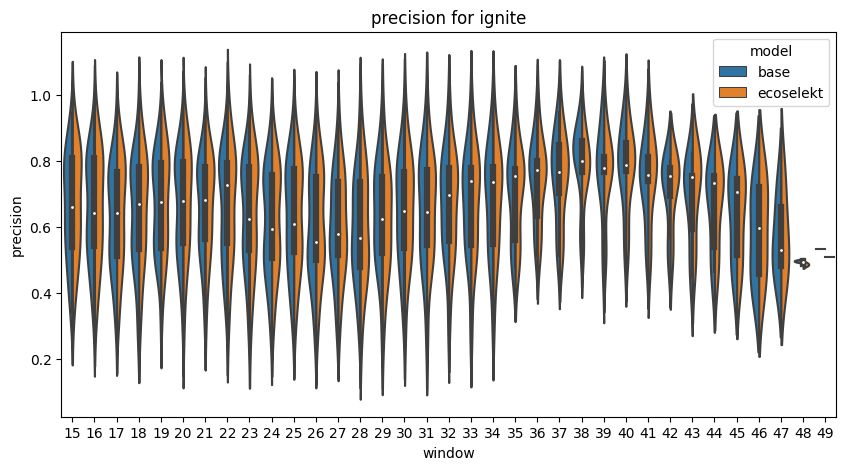

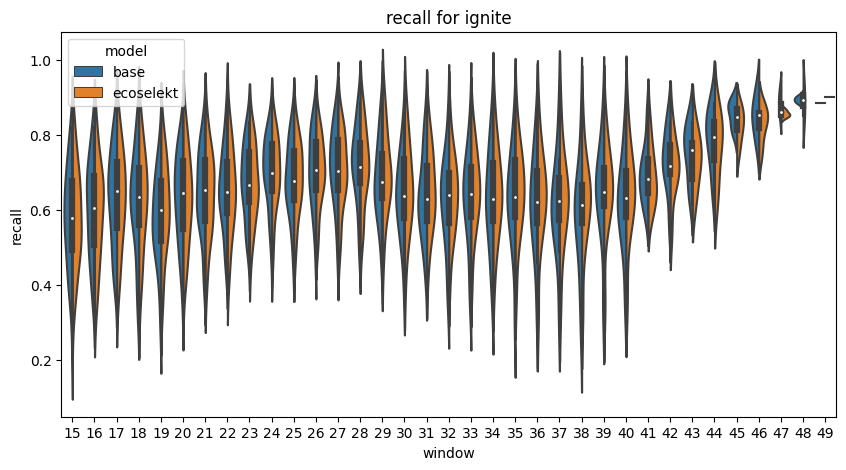

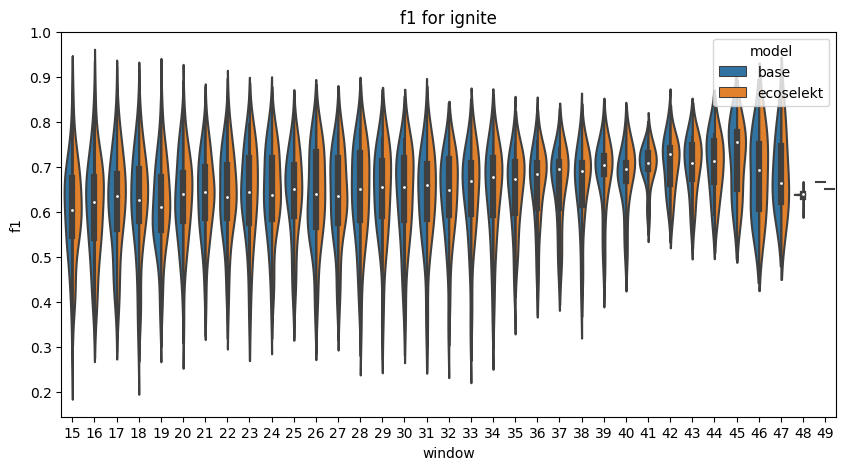

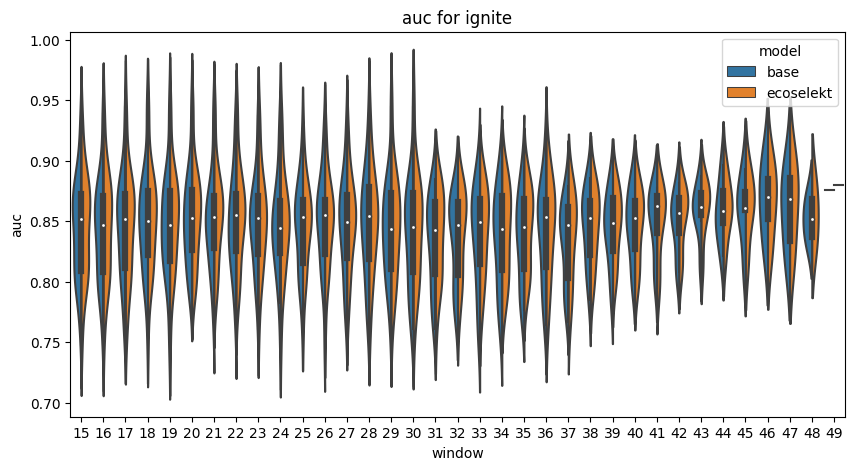

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


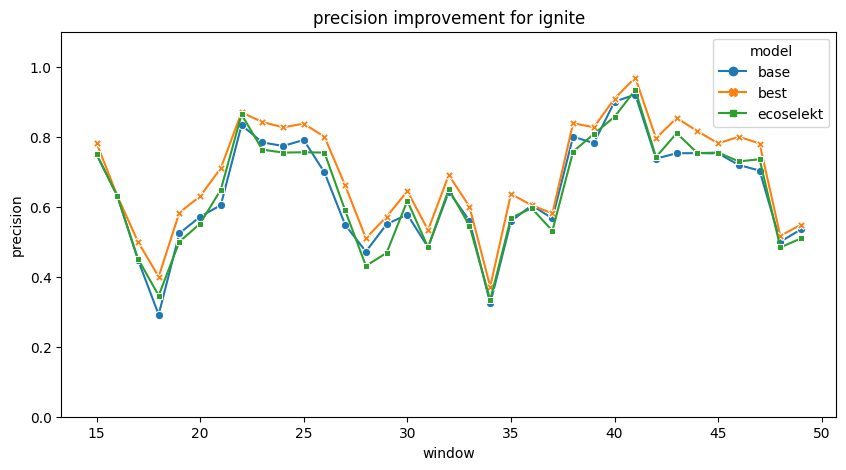

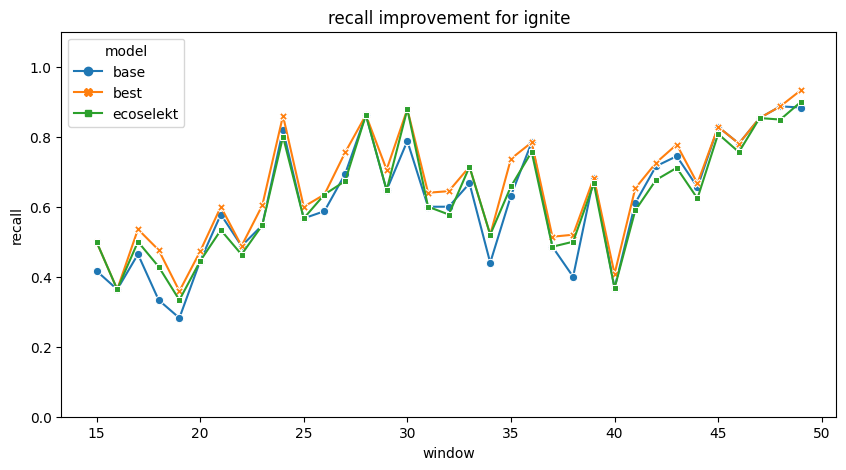

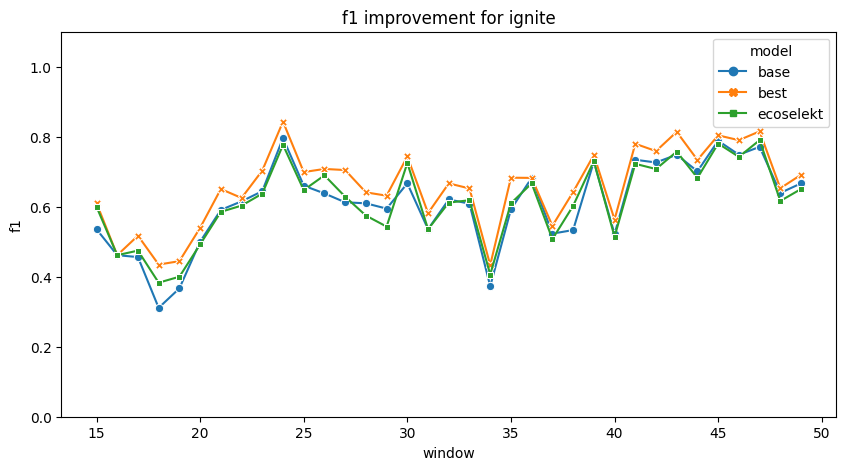

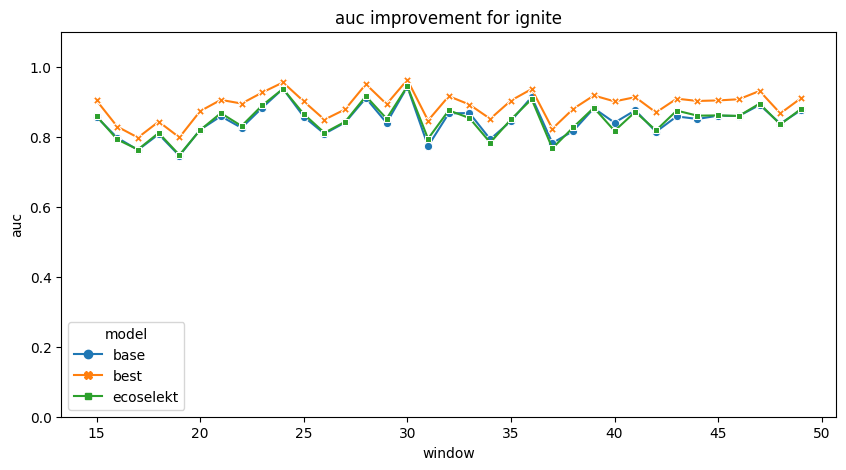

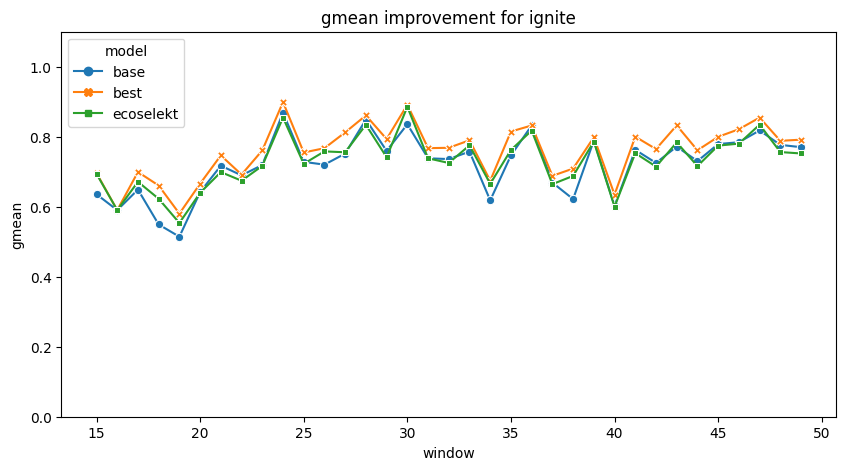

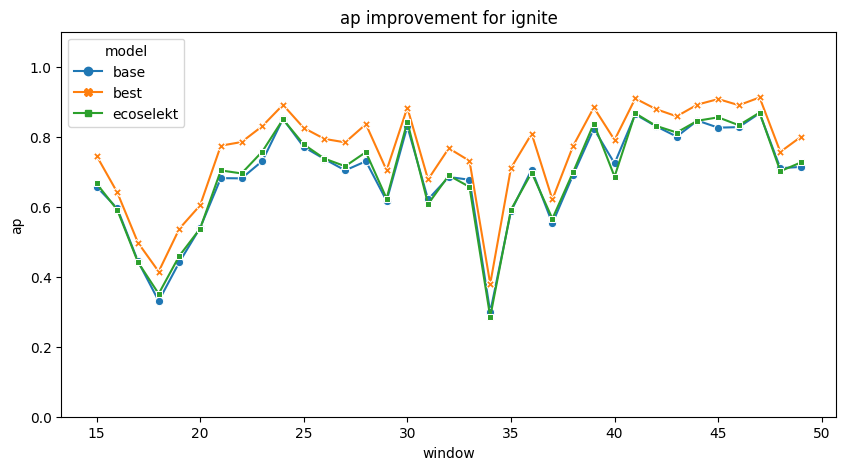

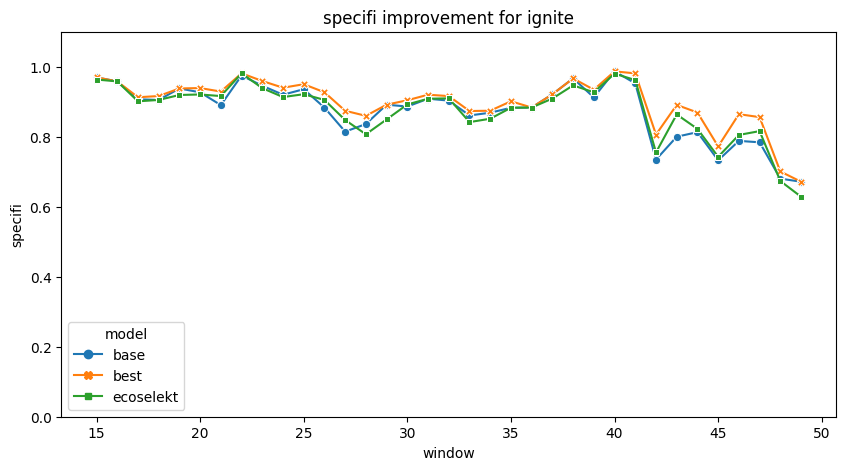

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

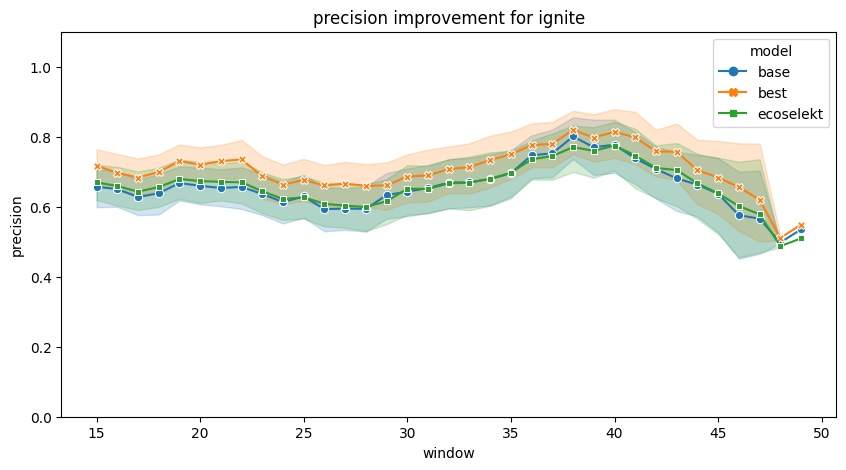

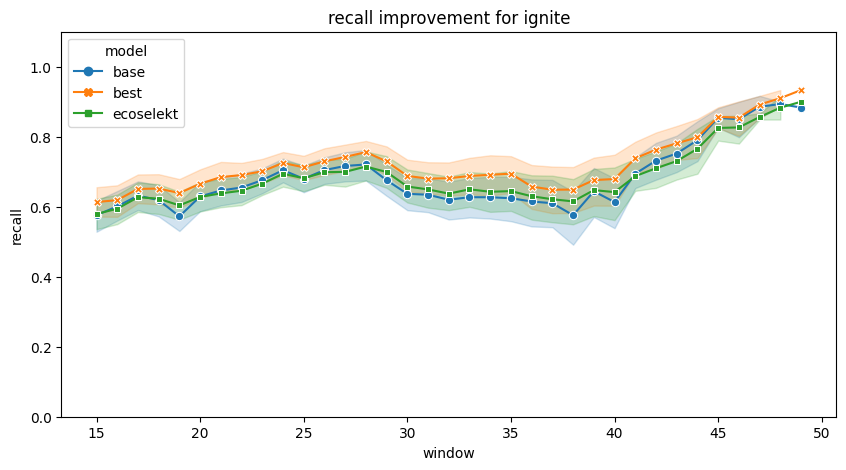

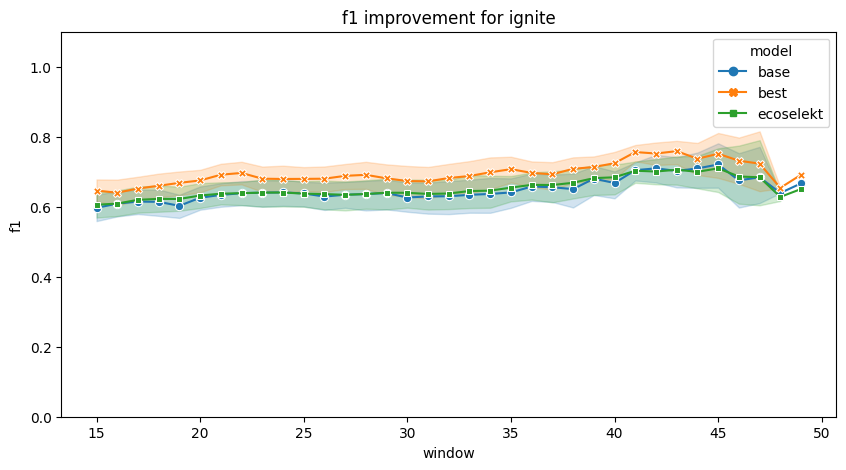

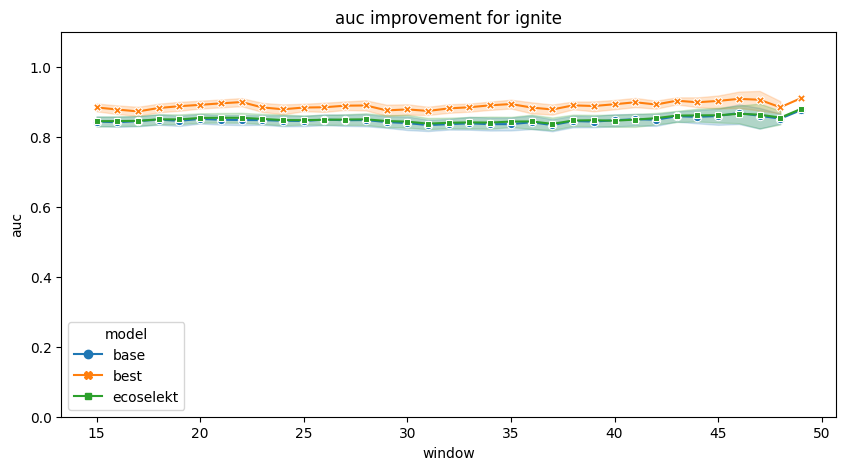

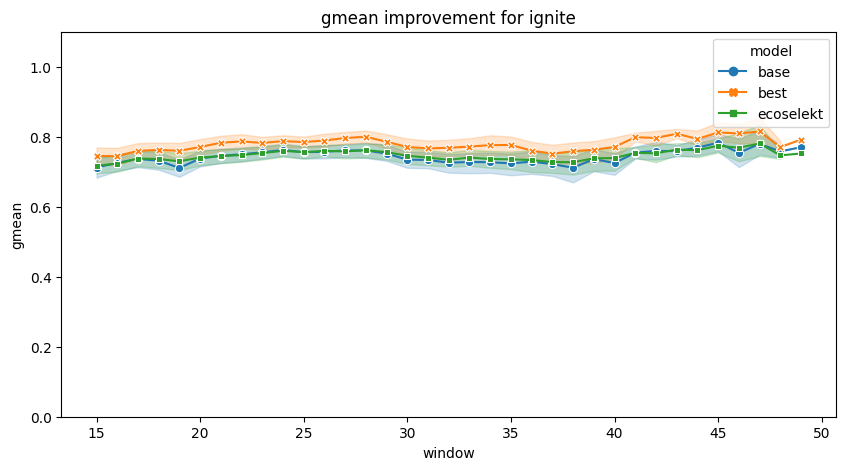

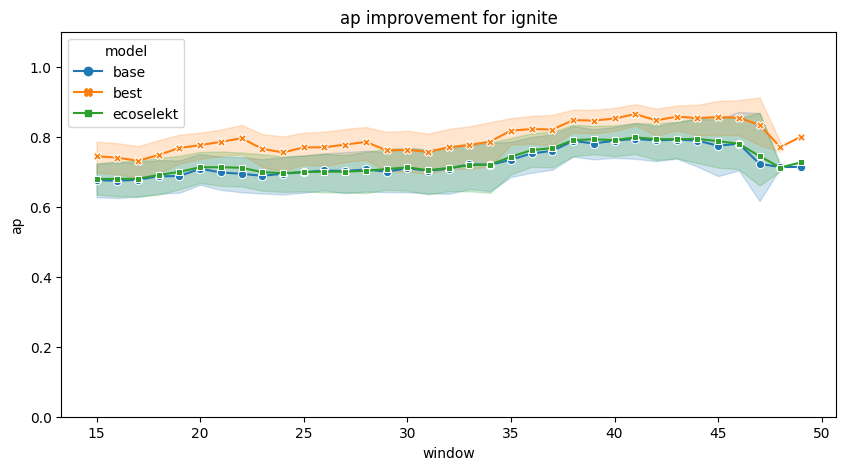

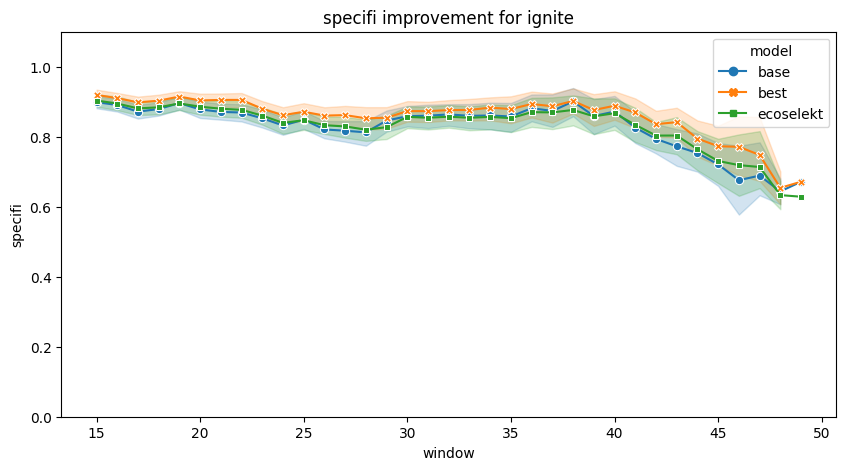

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.062489338393788785
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.33947890807294845
Wilcoxon test significance: False


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(126000, 4)


,commit_id,window,test_split,model_version
0,55fd133db25c7e7e99fc4b0fc3989e258cac1694,15,16,11
1,0af0baf926d351c6e1eb47f8e300129f6780e517,15,16,15
2,b0caf3a4a7d898109a67ce409646671ab126a419,15,16,15
3,07ac8b1854426f24df5102e5ac815a379df7b3dd,15,16,15
4,8e0ce1bc048b968ac9d8544e30c7f47faed51f17,15,16,15


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(164000, 4)


,commit_id,window,test_split,model_version
0,0135a4cb089faa828c9797b80ac0570fffffc4ad,15,16,13
1,01689b1d576e02179c34eb1126b41b341c40eb52,15,16,15
2,03890cc6fcd0f3c601d89ef97c16607a5dc61329,15,16,15
3,03c899224e19af3597652a64ea1a4c0075c8e74c,15,16,2
4,04927740bccae57ba6e9c9b440c18b8a191f9fa4,15,16,2


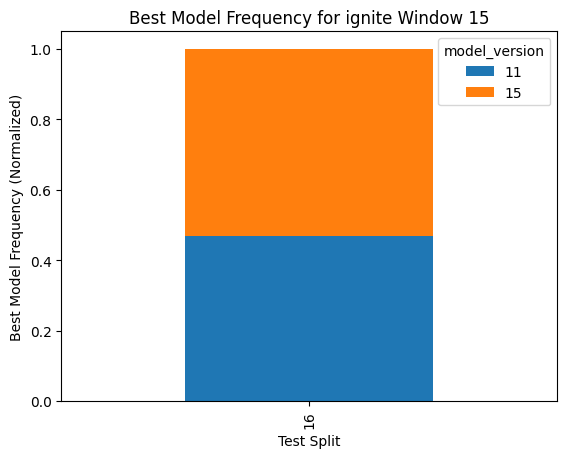

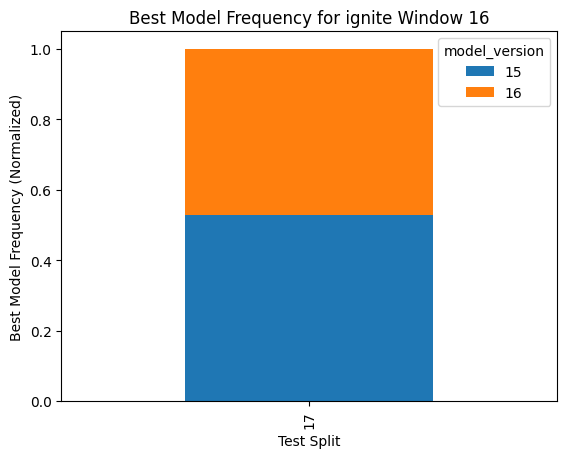

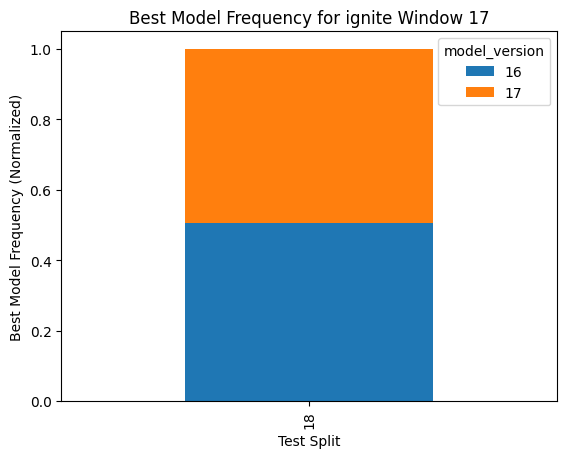

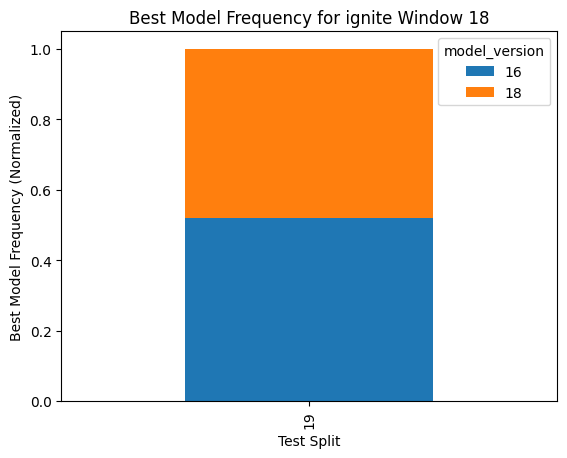

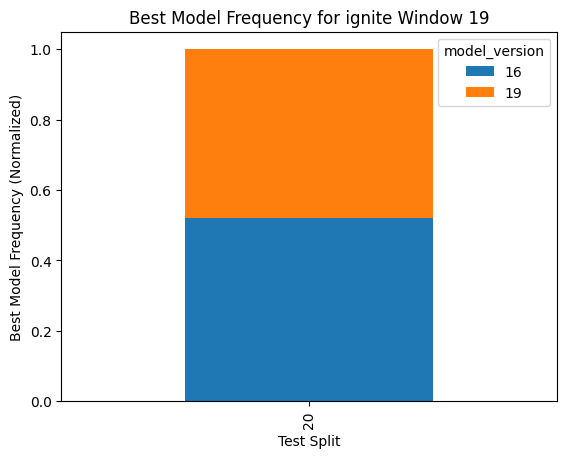

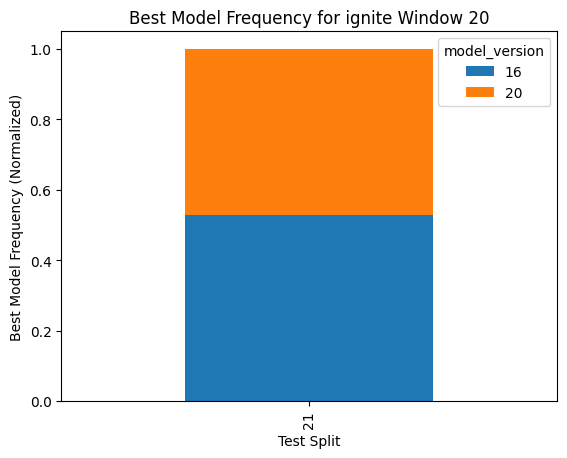

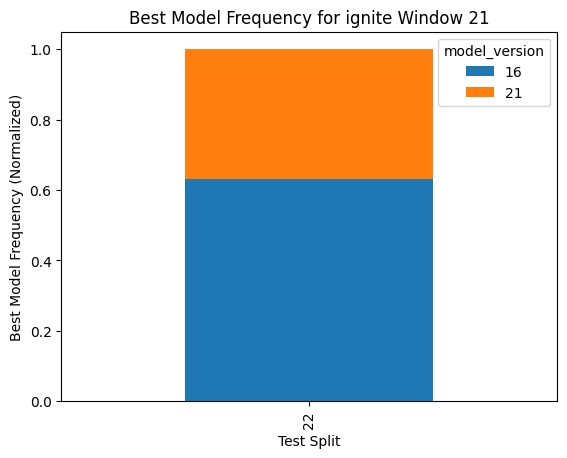

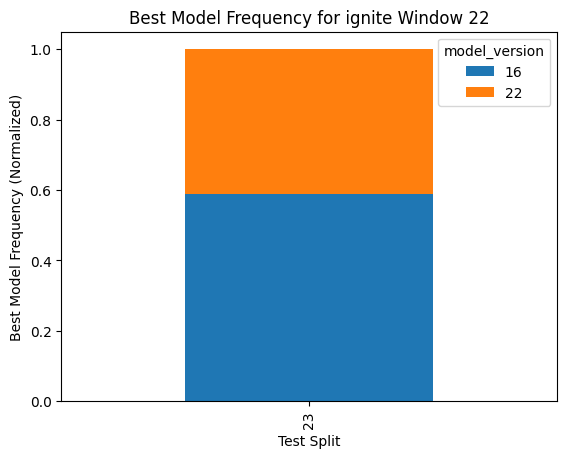

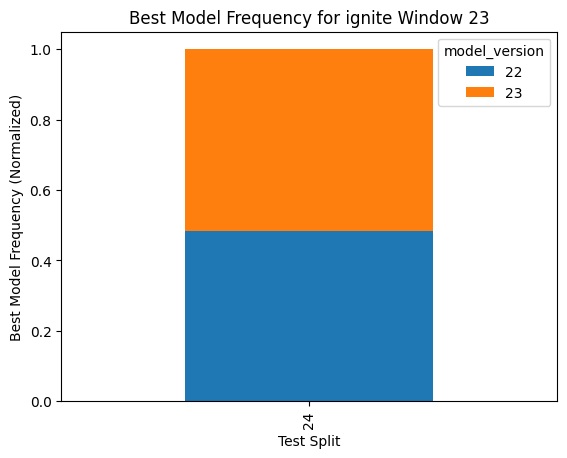

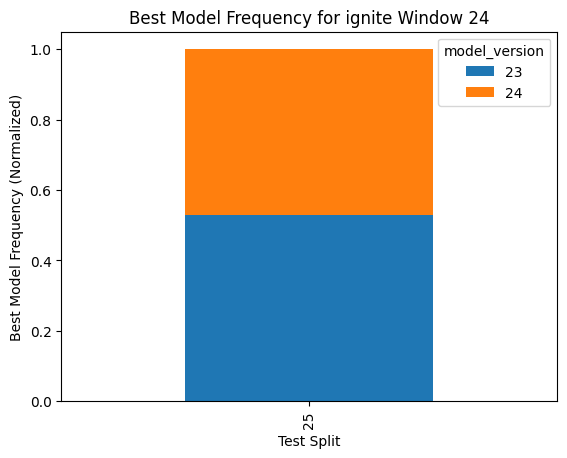

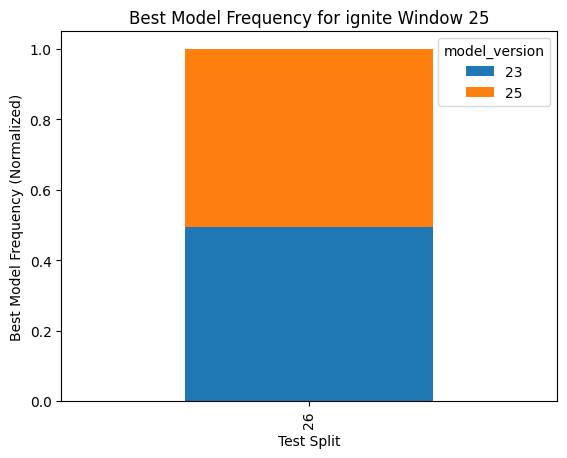

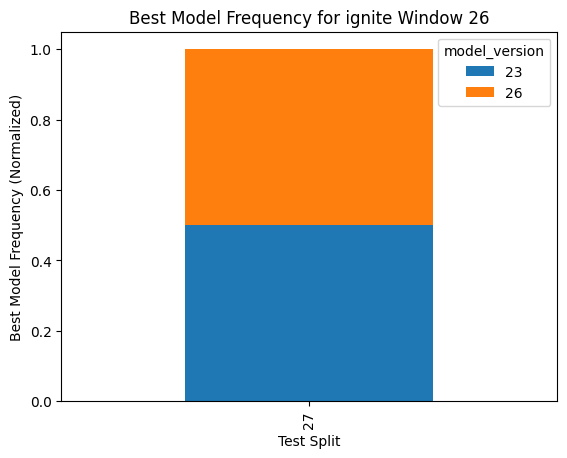

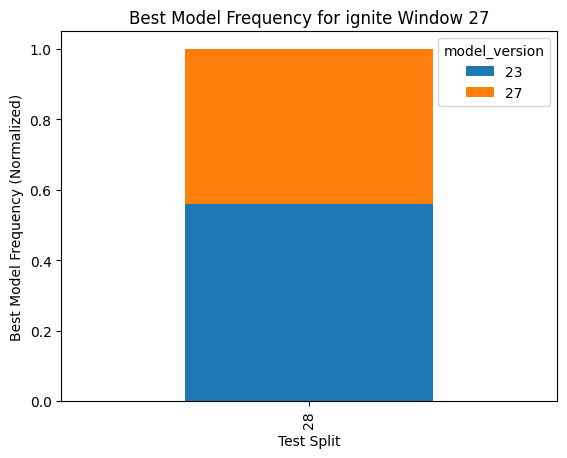

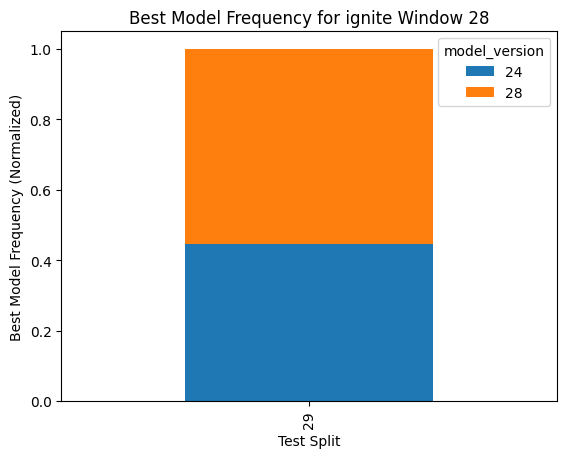

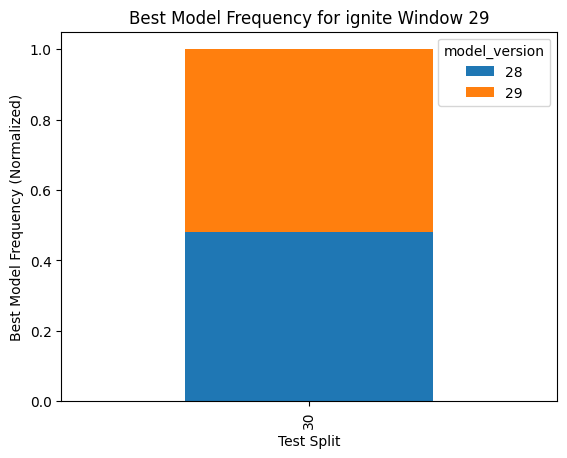

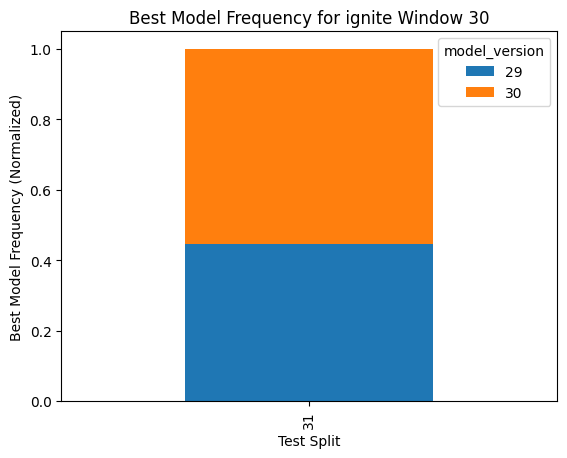

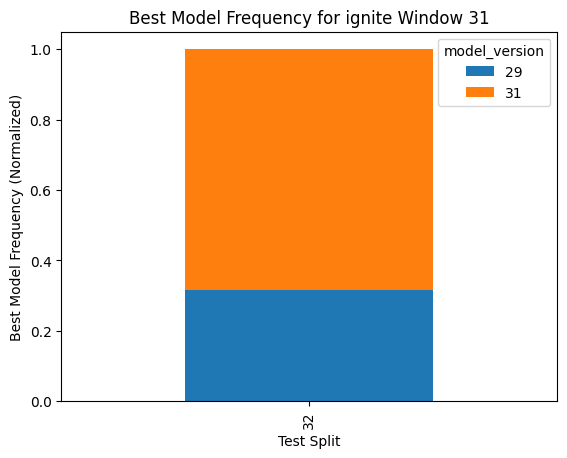

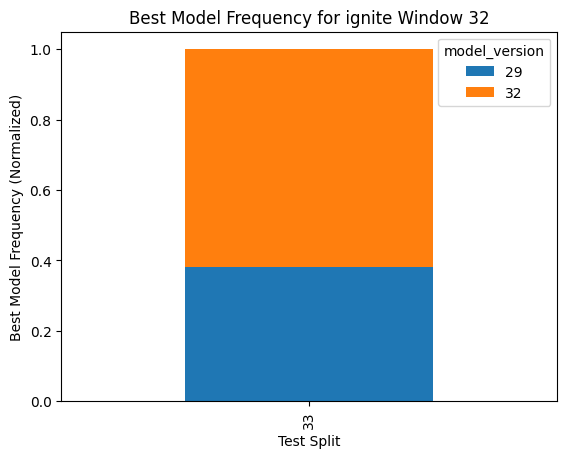

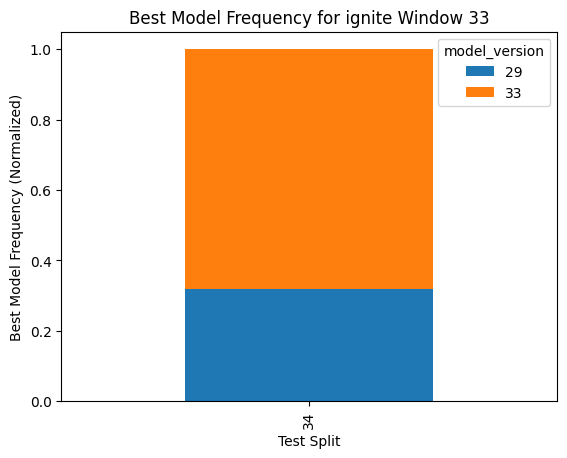

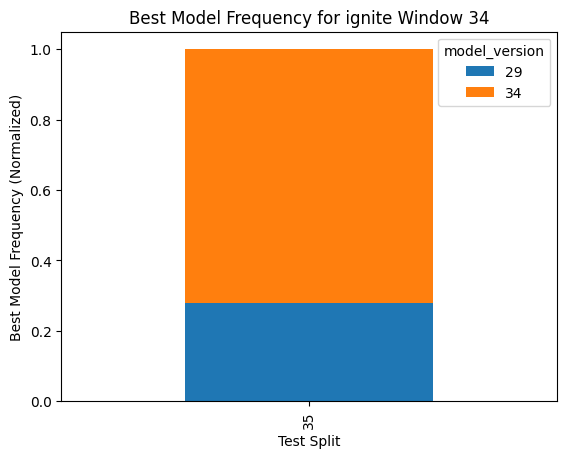

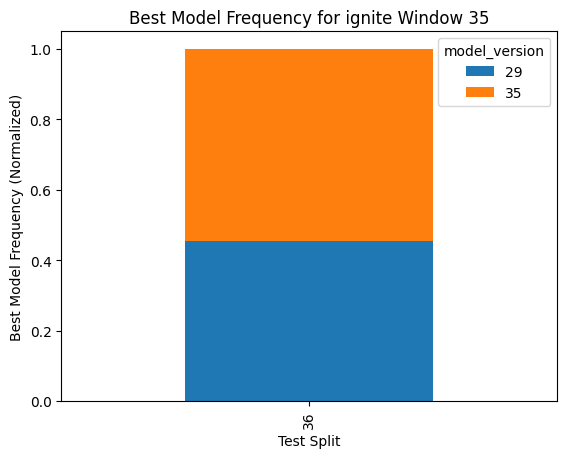

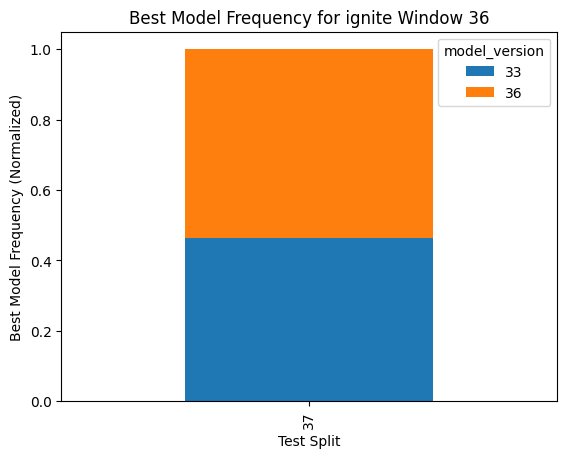

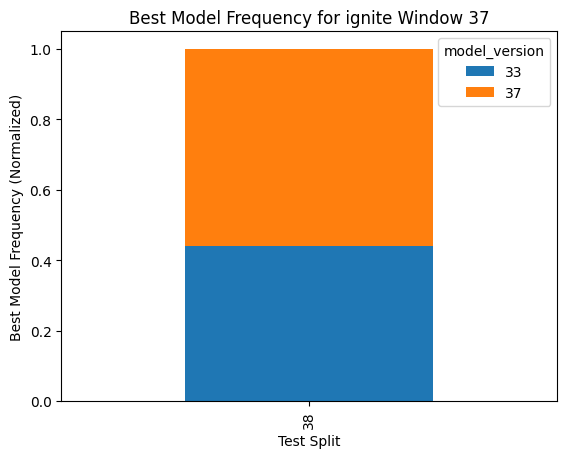

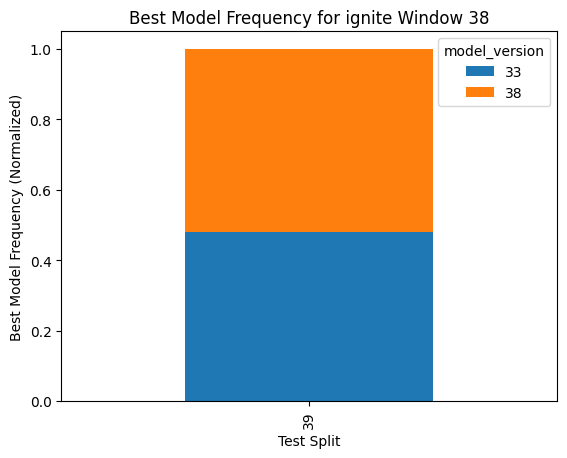

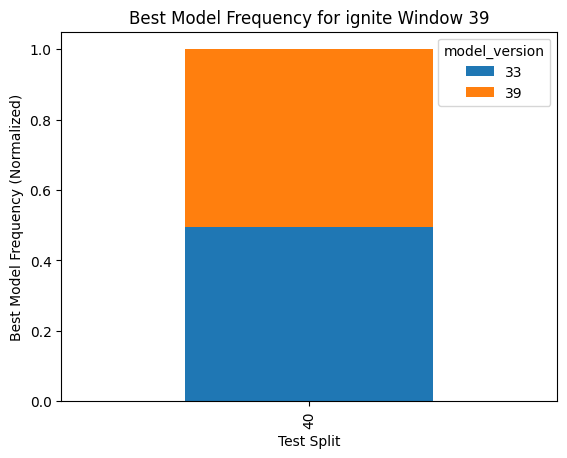

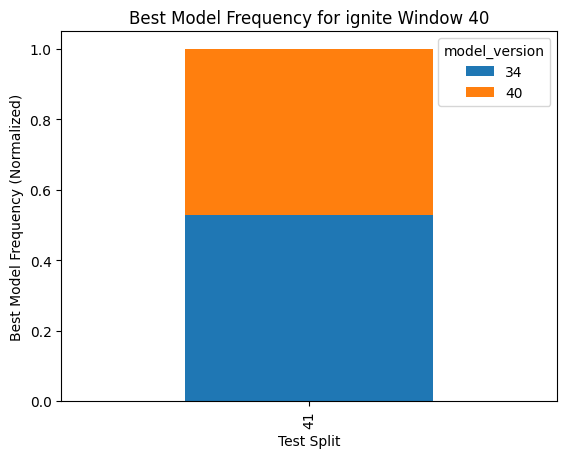

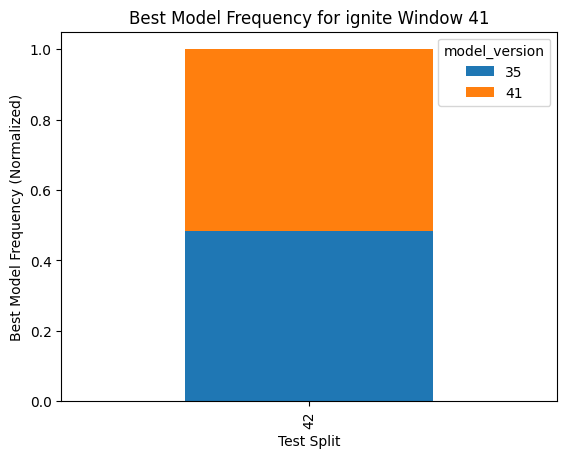

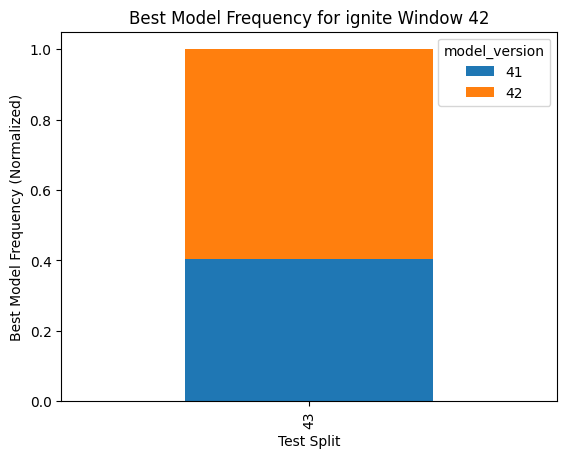

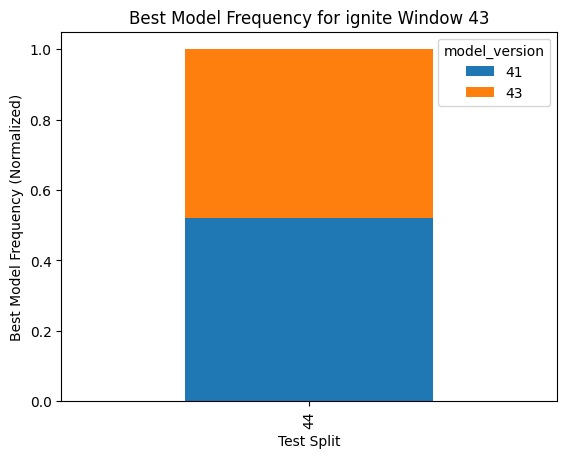

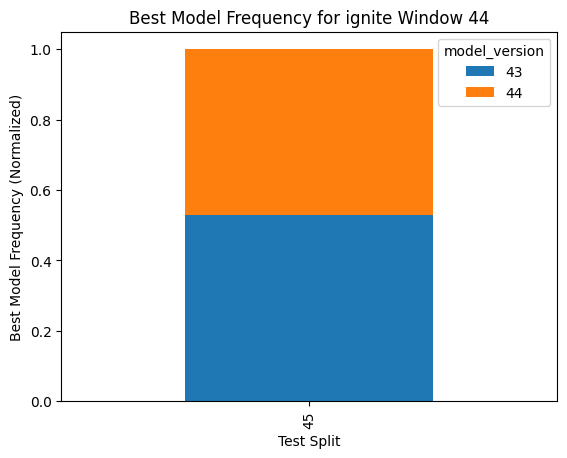

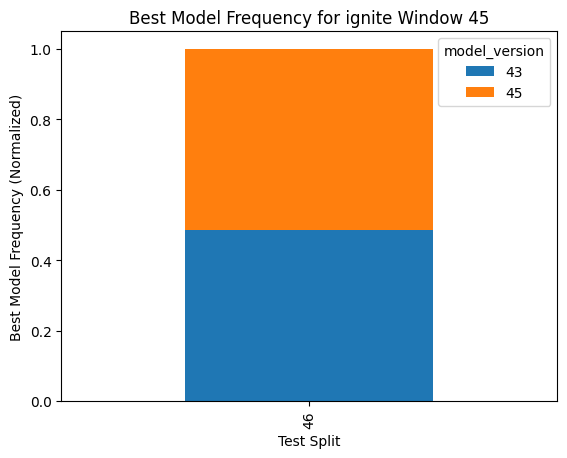

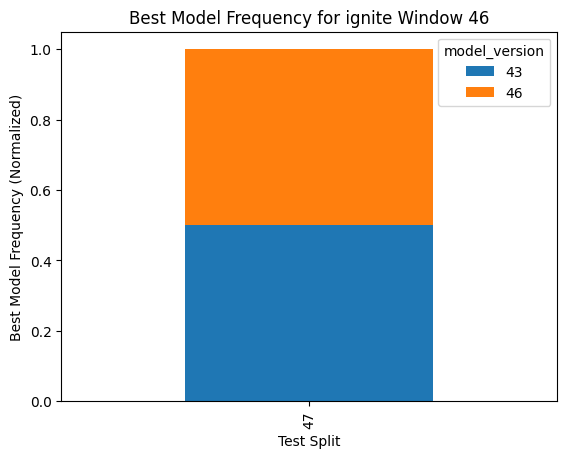

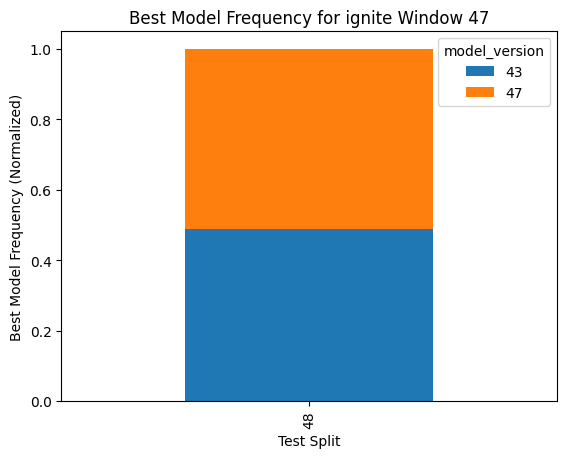

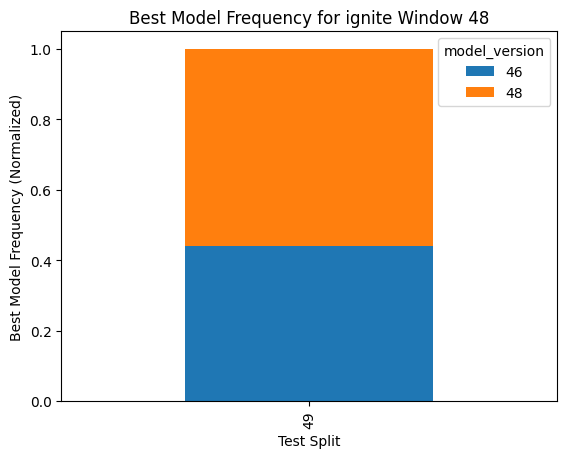

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")